# Data Cleaning

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso
from math import radians, sin, cos, sqrt, atan2
from scikitplot.metrics import plot_cumulative_gain
from sklearn.metrics import confusion_matrix

In [78]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [79]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [80]:
#converting data types

df['price'] = df['price'].astype(float)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [81]:
#checking for any anomalous numeric values

df[["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", 
   "availability_365"]].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


no anomalous numeric value found   
high positive skewness of minimum_nights can be attributed to the presence of long-term rental apartments in the data

In [82]:
#checking for missing values

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [83]:
#name column

display(df['name'].value_counts())

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

As there are 47,906 unique values in "name" column, it can be deemed to have low inferential value. 
Moreover, it has null values, hence, it can be dropped.

In [84]:
#host_name column 

display(df['host_name'].value_counts())

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

As there are 11,449 unique values in "host_name" column, it can be deemed to have low inferential value. 
Moreover, it has null values, hence, it can be dropped.

In [85]:
#dropping the column with the null value

df.drop(columns= ["name", "host_name", "last_review"], inplace= True)

In [86]:
#filling the null space

df["reviews_per_month"].fillna(0, inplace= True)

5. Checking cleaned data

In [87]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [88]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0


# Exploratory Analysis

### Data distribution in Neighborhood group

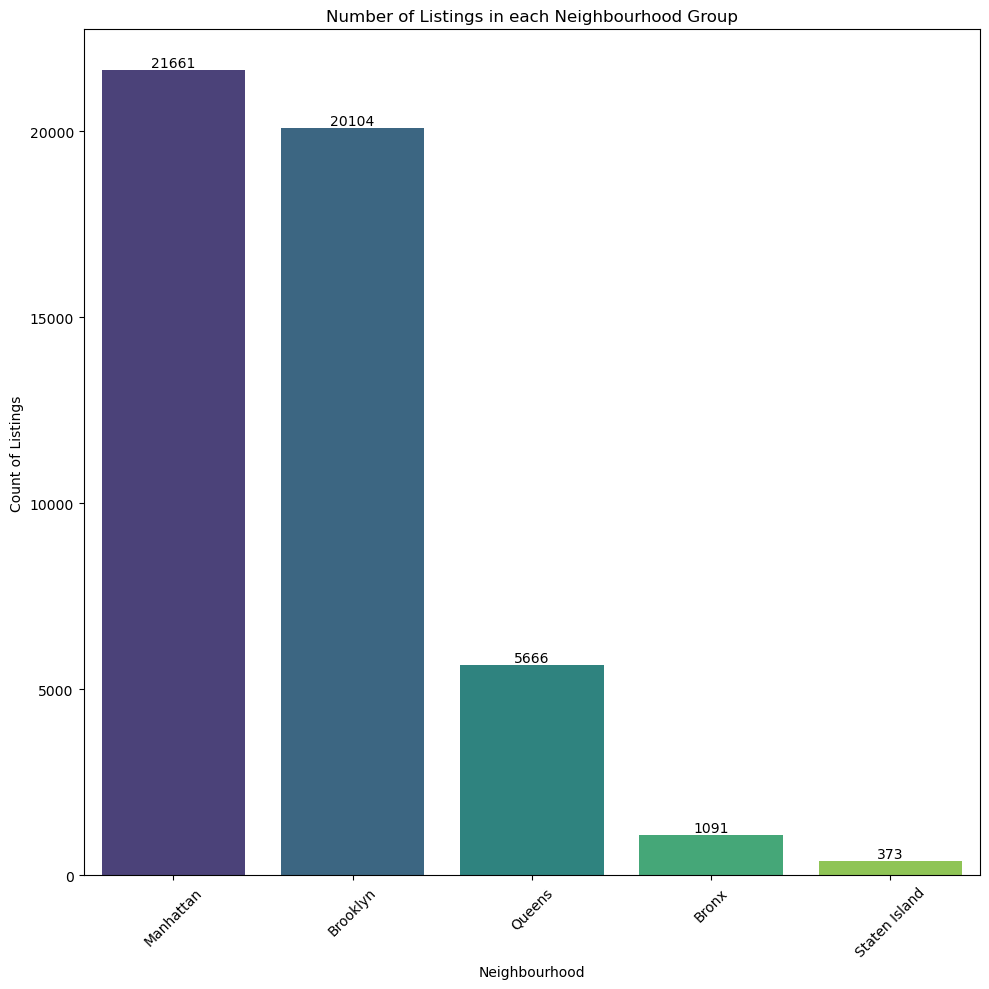

In [89]:
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(
    x='neighbourhood_group', 
    y='count', 
    data=neighbourhood_counts, 
    palette='viridis'
)

# Adding data labels
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom'
    )

plt.xlabel("Neighbourhood")
plt.ylabel("Count of Listings")
plt.title("Number of Listings in each Neighbourhood Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
#Neighbourhood supply analysis

neighbourhood_supply = df.groupby('neighbourhood_group').agg(
    total_listings=('id', 'count'),  
    total_reviews=('number_of_reviews', 'sum'),  
    avg_availability=('availability_365', 'mean')  
).reset_index()

neighbourhood_supply_sorted = neighbourhood_supply.sort_values(by='avg_availability', ascending=False)
 
display(neighbourhood_supply_sorted)

,neighbourhood_group,total_listings,total_reviews,avg_availability
4,Staten Island,373,11541,199.678284
0,Bronx,1091,28371,165.758937
3,Queens,5666,156950,144.451818
2,Manhattan,21661,454569,111.979410
1,Brooklyn,20104,486574,100.232292


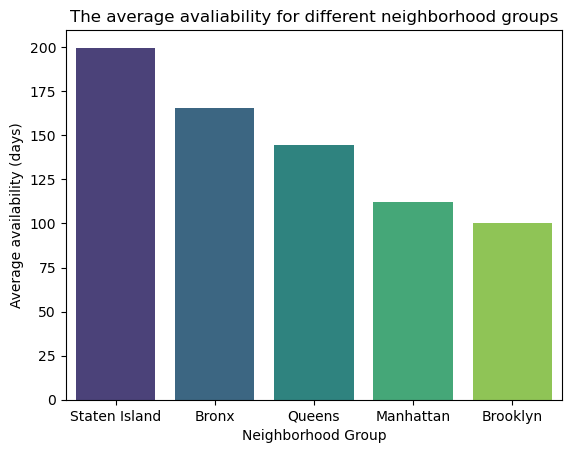

In [91]:
sns.barplot(x='neighbourhood_group', y='avg_availability', data=neighbourhood_supply_sorted, palette='viridis')
plt.title('The average avaliability for different neighborhood groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average availability (days)')
plt.show()

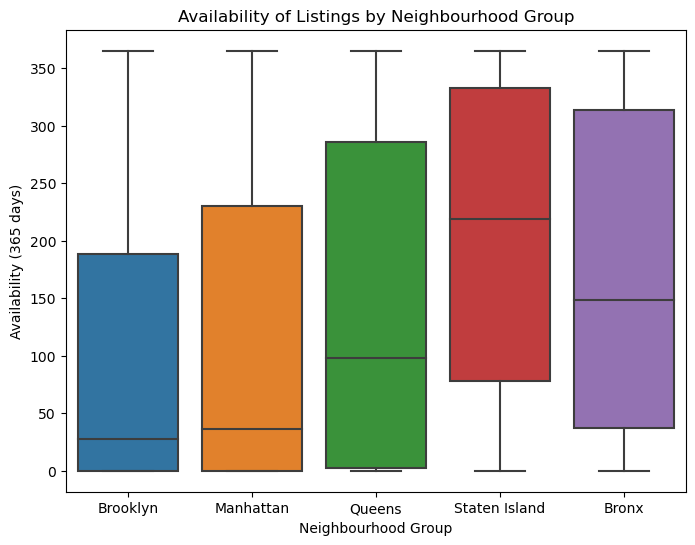

In [92]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')

ax.set_xlabel('Neighbourhood Group') 
ax.set_ylabel('Availability (365 days)') 
ax.set_title('Availability of Listings by Neighbourhood Group')

plt.show()

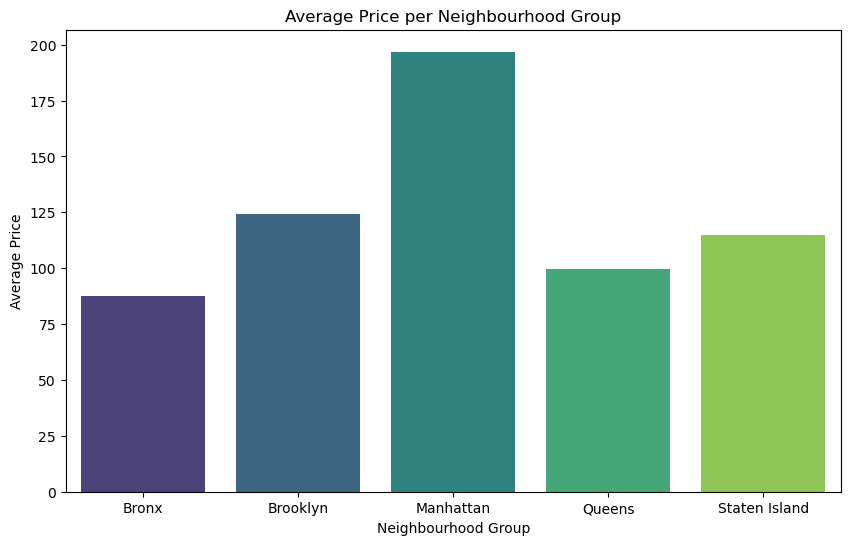

In [93]:
# Calculate the average price for each neighbourhood_group
avg_price = df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Plotting with matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=avg_price, palette='viridis')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price per Neighbourhood Group')
plt.show()

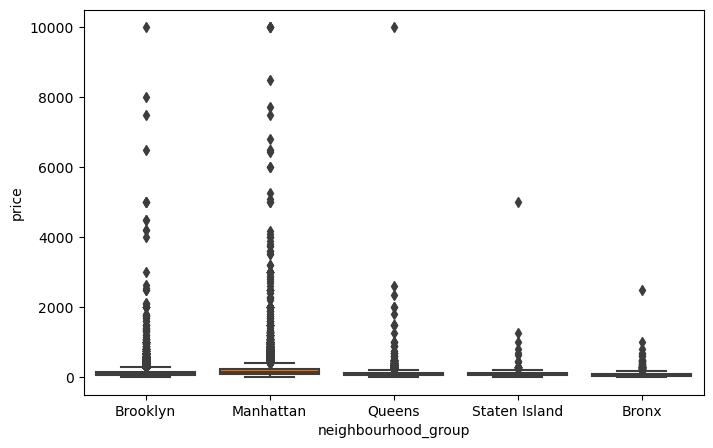

In [94]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='price')

The boxplot indicates that there are a lot of outliers in price data.

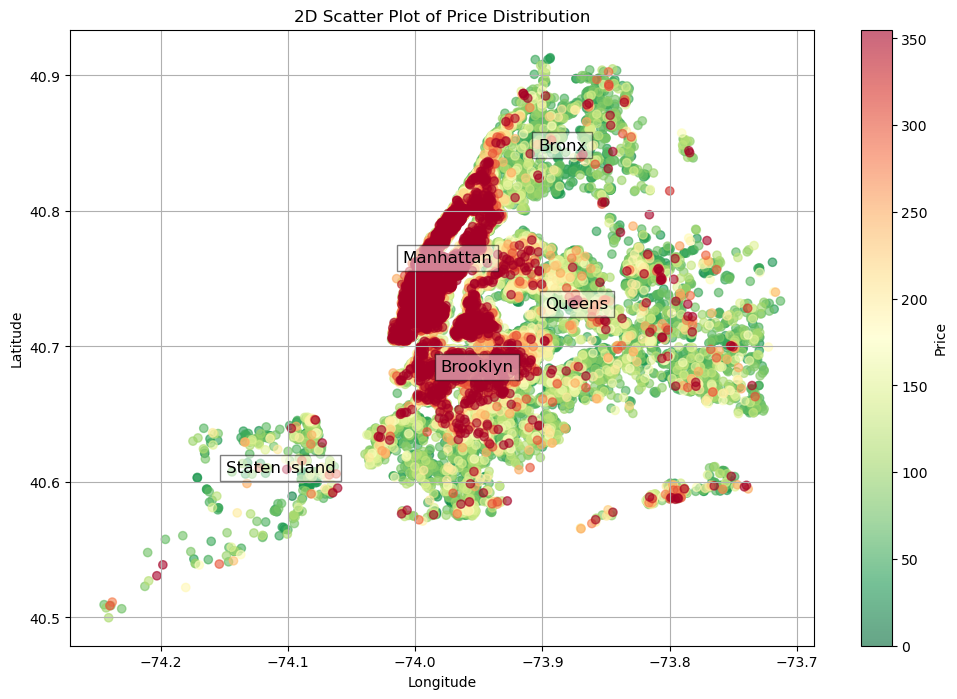

In [95]:
#visualizing 2D map of price

price_95th_percentile = np.percentile(df['price'], 95)

df_sorted = df.sort_values(by='price')

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_sorted['longitude'], df_sorted['latitude'], c=df_sorted['price'], cmap='RdYlGn_r', alpha=0.6, vmin=0, vmax=price_95th_percentile)
plt.colorbar(scatter, label='Price')
plt.title('2D Scatter Plot of Price Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(True)

neighborhood_groups = df['neighbourhood_group'].unique()
for neighborhood_group in neighborhood_groups:
    group_data = df[df['neighbourhood_group'] == neighborhood_group]
    mean_lon = group_data['longitude'].mean()
    mean_lat = group_data['latitude'].mean()
    plt.text(mean_lon, mean_lat, neighborhood_group, fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

### Data distribution based on room type

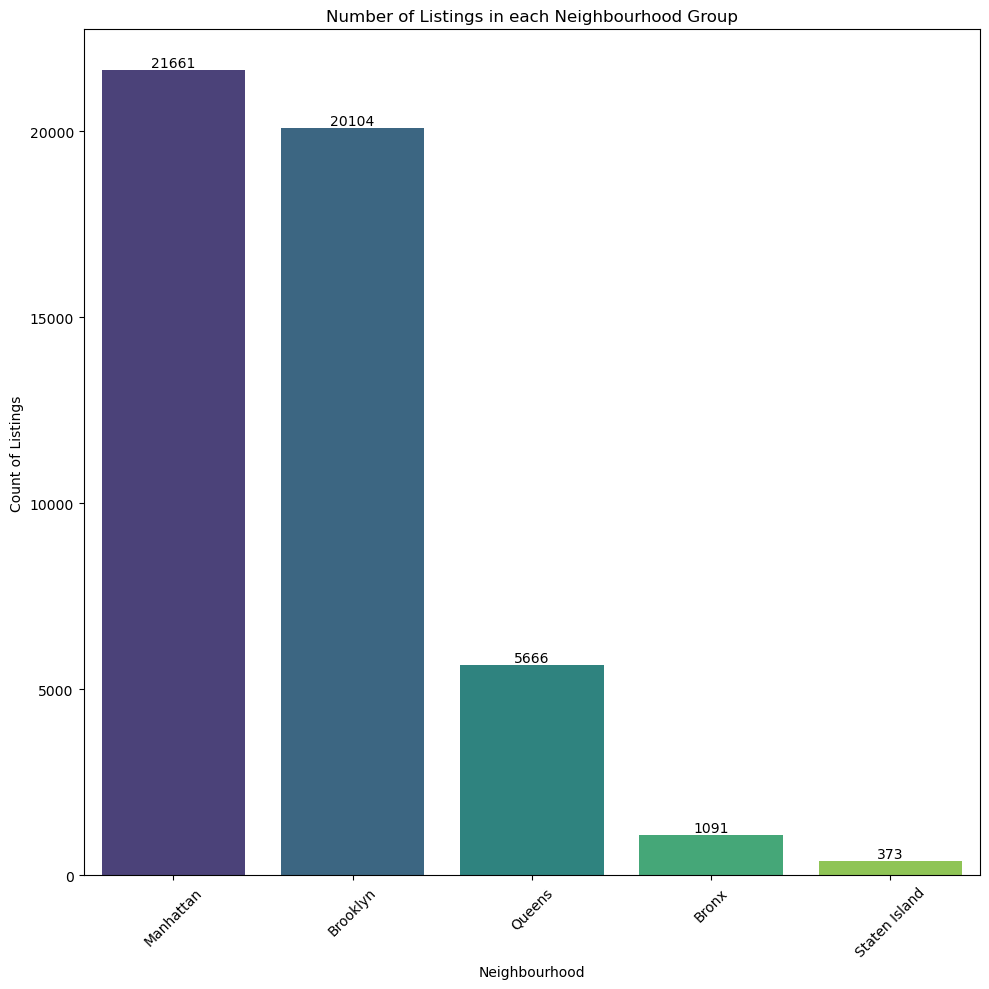

In [96]:
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(
    x='neighbourhood_group', 
    y='count', 
    data=neighbourhood_counts, 
    palette='viridis'
)

# Adding data labels
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom'
    )

plt.xlabel("Neighbourhood")
plt.ylabel("Count of Listings")
plt.title("Number of Listings in each Neighbourhood Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
#room type supply analysis

room_type_supply = df.groupby('room_type').agg(  
    total_listings=('id', 'count'), 
    total_reviews=('number_of_reviews', 'sum'),  
    avg_availability=('availability_365', 'mean')  
).reset_index()

room_type_supply_sorted = room_type_supply.sort_values(by='avg_availability', ascending=False)
 
print(room_type_supply_sorted)

         room_type  total_listings  total_reviews  avg_availability
2      Shared room            1160          19256        162.000862
0  Entire home/apt           25409         580403        111.920304
1     Private room           22326         538346        111.203933


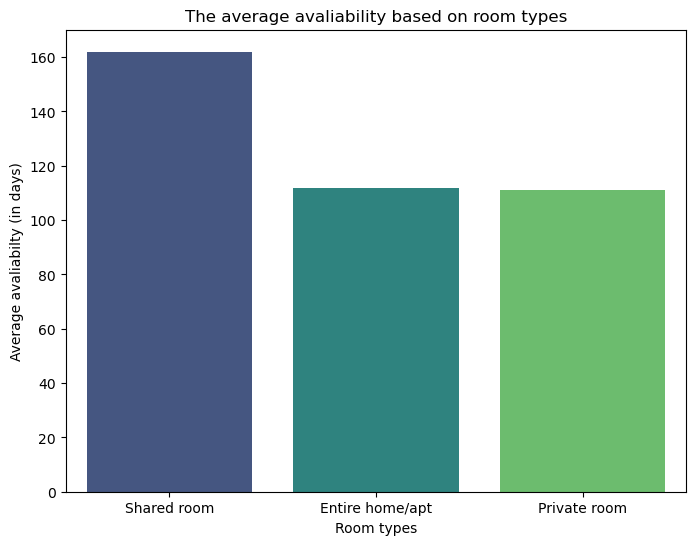

In [98]:
plt.figure(figsize=(8,6))
sns.barplot(x='room_type', y='avg_availability', data=room_type_supply_sorted, palette='viridis')
plt.title('The average avaliability based on room types')
plt.xlabel('Room types')
plt.ylabel('Average avaliabilty (in days)')
plt.show()

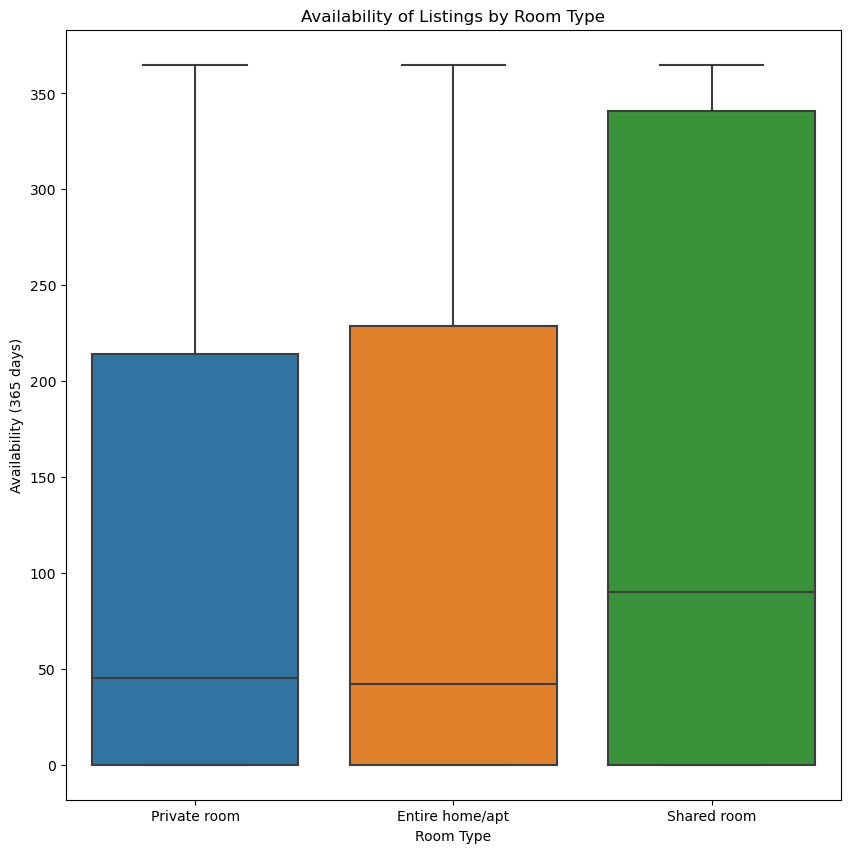

In [99]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='room_type',y='availability_365')

ax.set_xlabel('Room Type') 
ax.set_ylabel('Availability (365 days)') 
ax.set_title('Availability of Listings by Room Type')

plt.show()

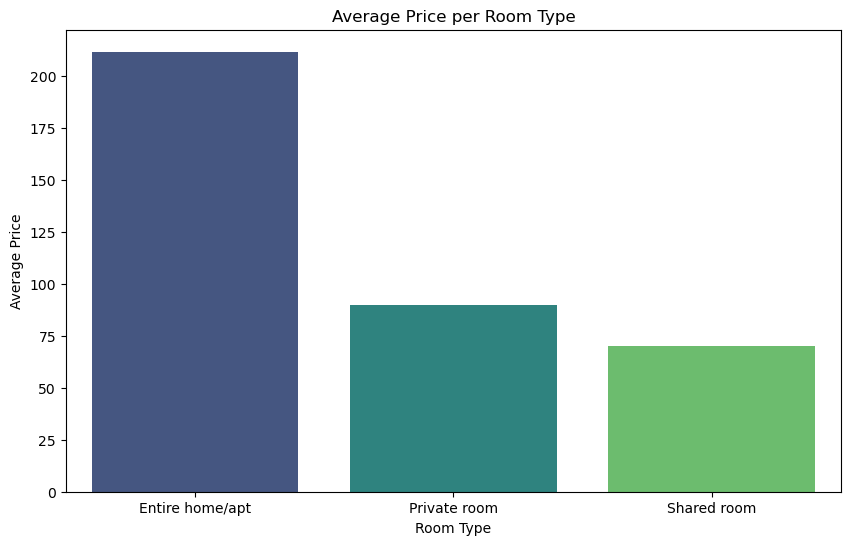

In [100]:
#calculate the average price for each room_type
avg_price = df.groupby('room_type')['price'].mean().reset_index()

# Plotting with matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=avg_price, palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price per Room Type')
plt.show()

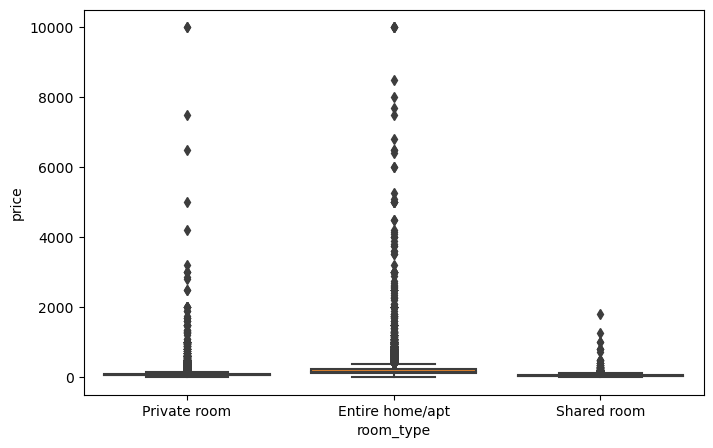

In [101]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df, x='room_type',y='price')

Room type box plot further supports the hypothesis that there are a lot of price outliers. 

# Feature Engineering

In [102]:
#selecting useful features

features = ['neighbourhood_group', 'room_type','price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 
           'calculated_host_listings_count','availability_365']
data = df[features]
data.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149.0,1,9,0.21,6,365
1,Manhattan,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,Private room,150.0,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,Entire home/apt,80.0,10,9,0.10,1,0


### Improving the readibility of price 

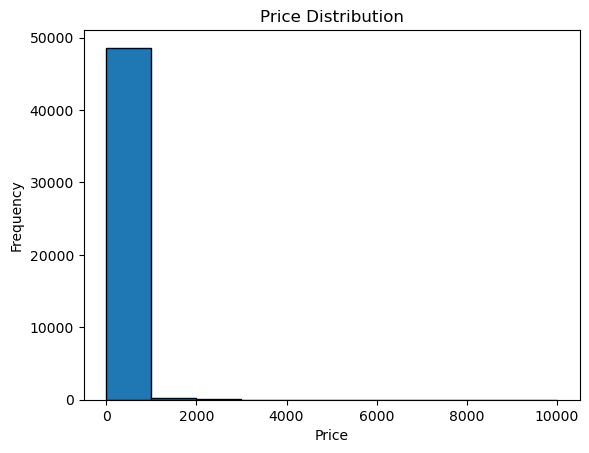

In [103]:
# Plotting a histogram
plt.hist(df['price'], bins=10, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

This confirms the hypothesis of price data having a high number of outliers.  

In [104]:
#dropping the rows with outlier price values

price_Q1 = data['price'].quantile(0.25)
price_Q3 = data['price'].quantile(0.75)

# Calculate IQR
IQR = price_Q3 - price_Q1

# Define bounds for outliers
lower_bound = price_Q1 - 1.5 * IQR
upper_bound = price_Q3 + 1.5 * IQR


data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

print(f'New size-{data.shape[0]}\nOld size-{df.shape[0]}')

New size-45923
Old size-48895


Dropping the outliers does not cause significant data loss.

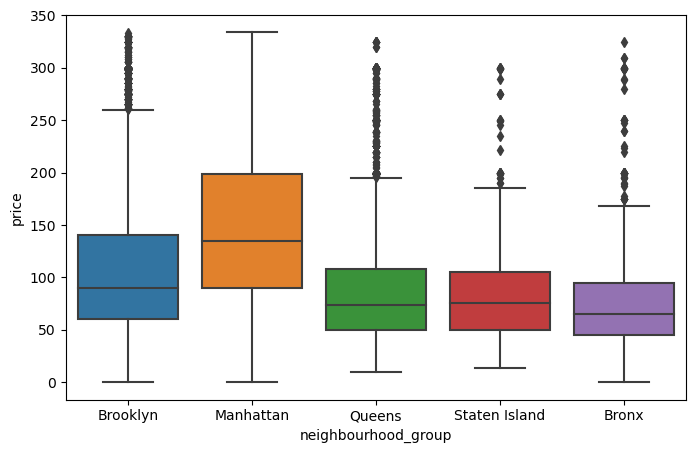

In [105]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='price')

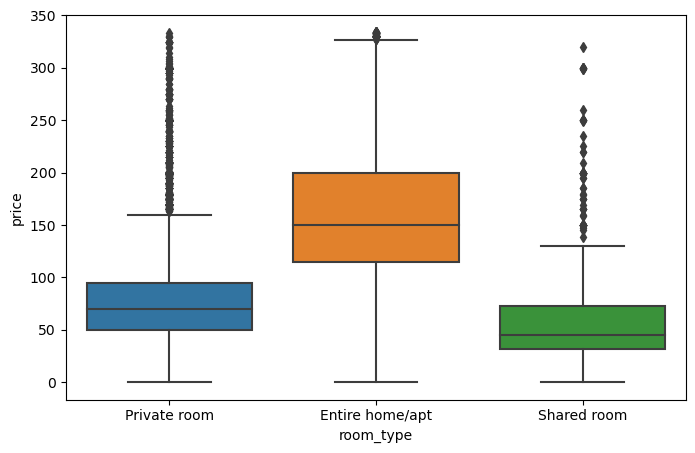

In [106]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=data, x='room_type',y='price')

Inferential value of price data based on neighbourhood_group and room_type is significantly improved, as demonstrated by the visualizations. 

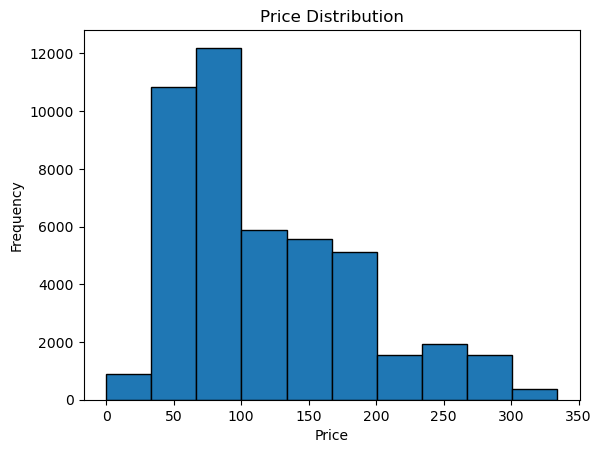

In [107]:
# Plotting a histogram
plt.hist(data['price'], bins=10, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Optimizing feature variables

In [108]:
# Create dummy variables for 'neighbourhood_group' and 'room_type'
data = pd.get_dummies(
    data,
    columns=['neighbourhood_group', 'room_type'],
    prefix=['neighbourhood', 'room'],
    drop_first=False  # Set to True if you want to avoid multicollinearity
)

data.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Bronx,neighbourhood_Brooklyn,neighbourhood_Manhattan,neighbourhood_Queens,neighbourhood_Staten Island,room_Entire home/apt,room_Private room,room_Shared room
0,149.0,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,225.0,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,150.0,3,0,0.00,1,365,0,0,1,0,0,0,1,0
3,89.0,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,80.0,10,9,0.10,1,0,0,0,1,0,0,1,0,0


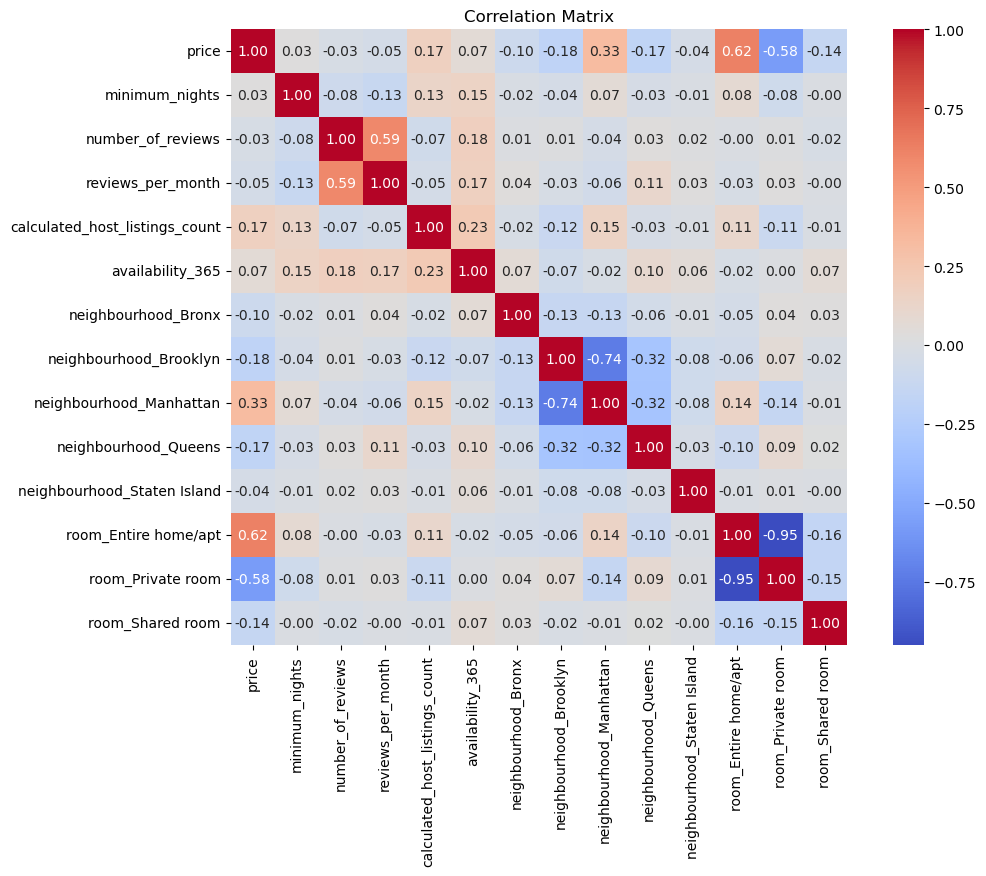

In [116]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [144]:
#number of reviews is dropped as it is highly correlated with reviews per month 
data.drop(['number_of_reviews'], axis = 1, inplace = True)

# Linear Regression

In [145]:
# Splitting the data to train and test split 

X = data.drop(['price'], axis = 1)      

y = data['price']                  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) 

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36738, 12)

(9185, 12)

(36738,)

(9185,)

In [146]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   

X_test_scaled = scaler.transform(X_test)  

In [147]:
#converting the scaled features from an array to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)  

X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

### Multiple linear regression

In [148]:
# Fit the model
lm1 = LinearRegression().fit(X_train_scaled, y_train)

# Print the coefficients and associated feature names 
coefficients = lm1.coef_ 
feature_names = X_train.columns

#adjusting coefficients back to the original scale 
scaling_factors = scaler.scale_ 
adjusted_coefficients = coefficients / scaling_factors

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': adjusted_coefficients, 
                        'Absolute Coefficient': abs(adjusted_coefficients)}) 
coef_df.sort_values(by= 'Absolute Coefficient', ascending=False, inplace= True)

display(coef_df)

,Feature,Coefficient,Absolute Coefficient
11,room_Shared room,-58.711494,58.711494
9,room_Entire home/apt,41.956199,41.956199
10,room_Private room,-36.240347,36.240347
8,neighbourhood_Staten Island,-31.983095,31.983095
4,neighbourhood_Bronx,-29.136520,29.136520
6,neighbourhood_Manhattan,20.997149,20.997149
7,neighbourhood_Queens,-19.866027,19.866027
5,neighbourhood_Brooklyn,-8.701681,8.701681
1,reviews_per_month,-1.229321,1.229321
0,minimum_nights,-0.183505,0.183505


### Evaluating the model

In [149]:
# Evaluate the model
train_r2 = r2_score(y_train, train_pred) 
test_r2 = r2_score(y_test, test_pred) 
print("Train R2: {:.2%}".format(train_r2))
print("Test R2: {:.2%}".format(test_r2))


train_mse = mean_squared_error(y_train, train_pred)  
test_mse = mean_squared_error(y_test, test_pred)
print("Train MSE: {:.2f}".format(train_mse))
print("Test MSE: {:.2f}".format(test_mse))

Train R2: 43.69%
Test R2: 44.04%
Train MSE: 2613.91
Test MSE: 2604.01


### Visualizing the results

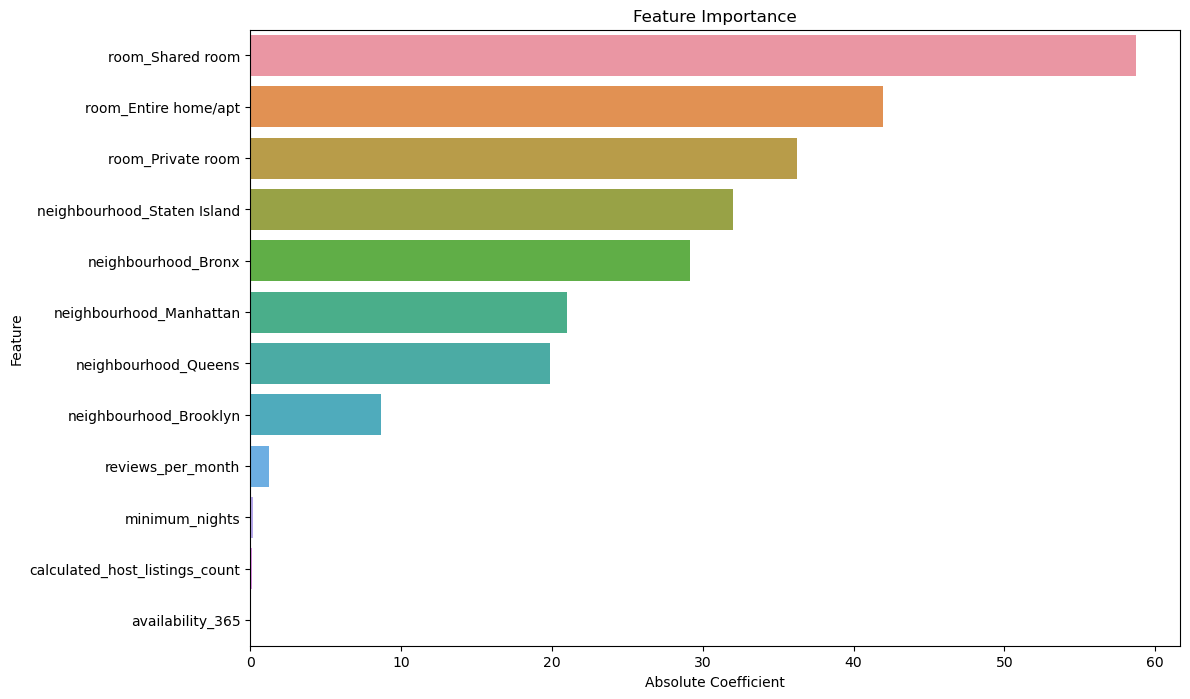

In [150]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Absolute Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

Room type and neighbourhood group are the most influential factors deciding price

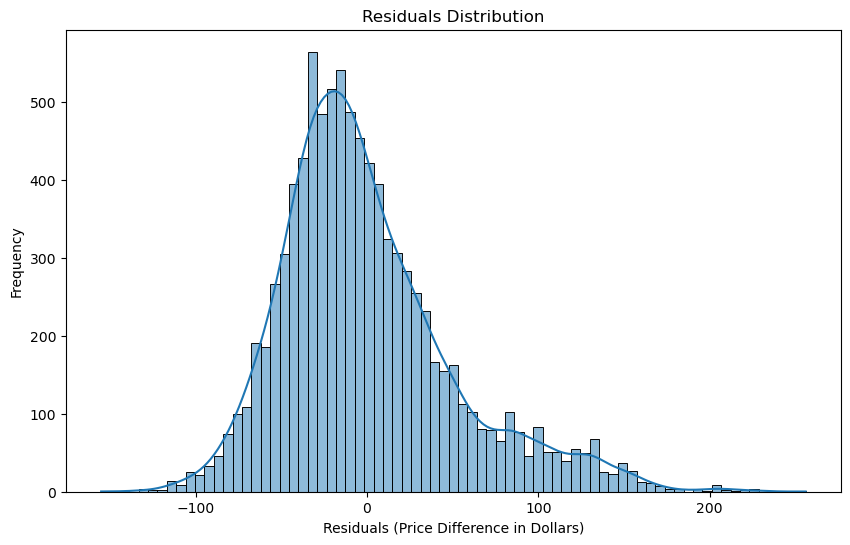

In [151]:
residuals = y_test - test_pred
# Residuals Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Price Difference in Dollars)')
plt.ylabel('Frequency')
plt.show()

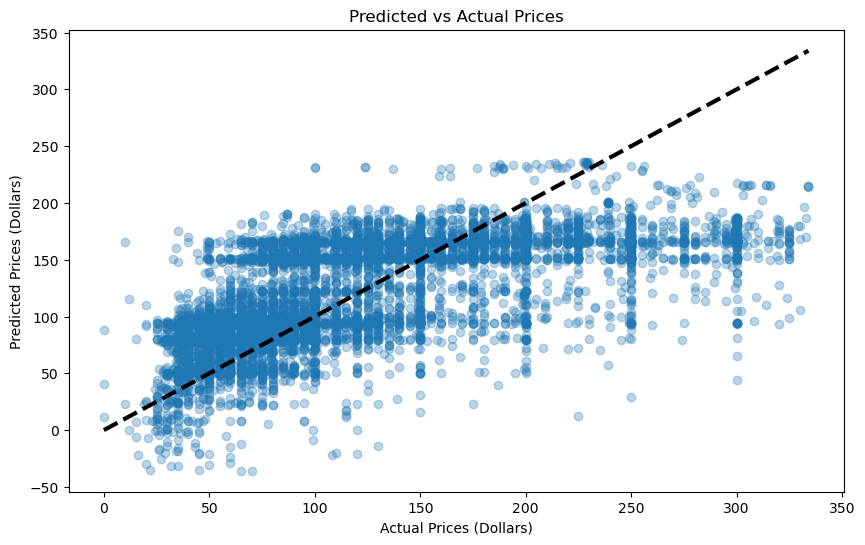

In [152]:
# Predicted vs Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices (Dollars)')
plt.ylabel('Predicted Prices (Dollars)')
plt.show()

In [154]:
#Manhattan, entire home/apartment 

inputs= [1, 0.2, 5, 10, 0, 0, 1, 0, 0, 1, 0, 0]
example= pd.DataFrame(columns= X.columns)
example.loc[len(example)] = inputs     
display(example)

,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Bronx,neighbourhood_Brooklyn,neighbourhood_Manhattan,neighbourhood_Queens,neighbourhood_Staten Island,room_Entire home/apt,room_Private room,room_Shared room
0,1.0,0.2,5.0,10.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [157]:
def pred(df): 
    # Scaling the features
    df_scaled = scaler.transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    
    # Predicting the price
    prediction = lm1.predict(df_scaled)
    
    # Ensure extracting a single element from the prediction array
    return float(prediction[0])

print('The price prediction for the example is {:.4f}'.format(pred(example)))

The price prediction for the example is 175.8506


# Decision Tree Model

### Creating a price category column

In [158]:
data['price'].describe()

count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64

encoding, labels, range  
0, low price, 0-65  
1, moderately low price, 65-100  
2, moderately high price, 100-159  
3, high price, 159-334


In [159]:
data['price_category'] = pd.qcut(data['price'], 
                                 q=[0, 0.25, 0.5, 0.75, 1.0], 
                                 labels=[0, 1, 2, 3])
data.drop('price', axis= 1, inplace= True)
data.head()

,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Bronx,neighbourhood_Brooklyn,neighbourhood_Manhattan,neighbourhood_Queens,neighbourhood_Staten Island,room_Entire home/apt,room_Private room,room_Shared room,price_category
0,1,0.21,6,365,0,1,0,0,0,0,1,0,2
1,1,0.38,2,355,0,0,1,0,0,1,0,0,3
2,3,0.00,1,365,0,0,1,0,0,0,1,0,2
3,1,4.64,1,194,0,1,0,0,0,1,0,0,1
4,10,0.10,1,0,0,0,1,0,0,1,0,0,1


In [160]:
# Splitting the data to train and test split 

X = data.drop('price_category', axis = 1)      

y = data['price_category']                  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) 

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36738, 12)

(9185, 12)

(36738,)

(9185,)

In [161]:
tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)   

param_range = {'max_depth': [1, 2, 3, 4, 5, 6], 
               'min_samples_leaf':[300, 325, 350, 400, 450, 500]}

tree_grid = GridSearchCV(estimator = tree_model, param_grid = param_range, cv = 5, scoring = 'accuracy')                       

tree_grid.fit(X_train_scaled, y_train)        

print("Best params: ", tree_grid.best_params_)    
print("Mean cv score (precision) for the best params: {:.2%}".format(tree_grid.best_score_))   

Best params:  {'max_depth': 6, 'min_samples_leaf': 300}
Mean cv score (precision) for the best params: 52.24%


In [162]:
model1 = DecisionTreeClassifier(criterion = 'entropy',     
                                max_depth = 6,             
                                min_samples_leaf= 325,     
                                random_state = 1)          

model1.fit(X_train, y_train)    

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=325,
                       random_state=1)

In [163]:
tree_train_score = model1.score(X_train, y_train)
tree_test_score = model1.score(X_test,y_test)

print("For the Decision Tree Model,\nTrain Accuracy: {:.2%}\nTest Acc: {:.2%}".format(tree_train_score,tree_test_score)) 

For the Decision Tree Model,
Train Accuracy: 52.58%
Test Acc: 52.07%


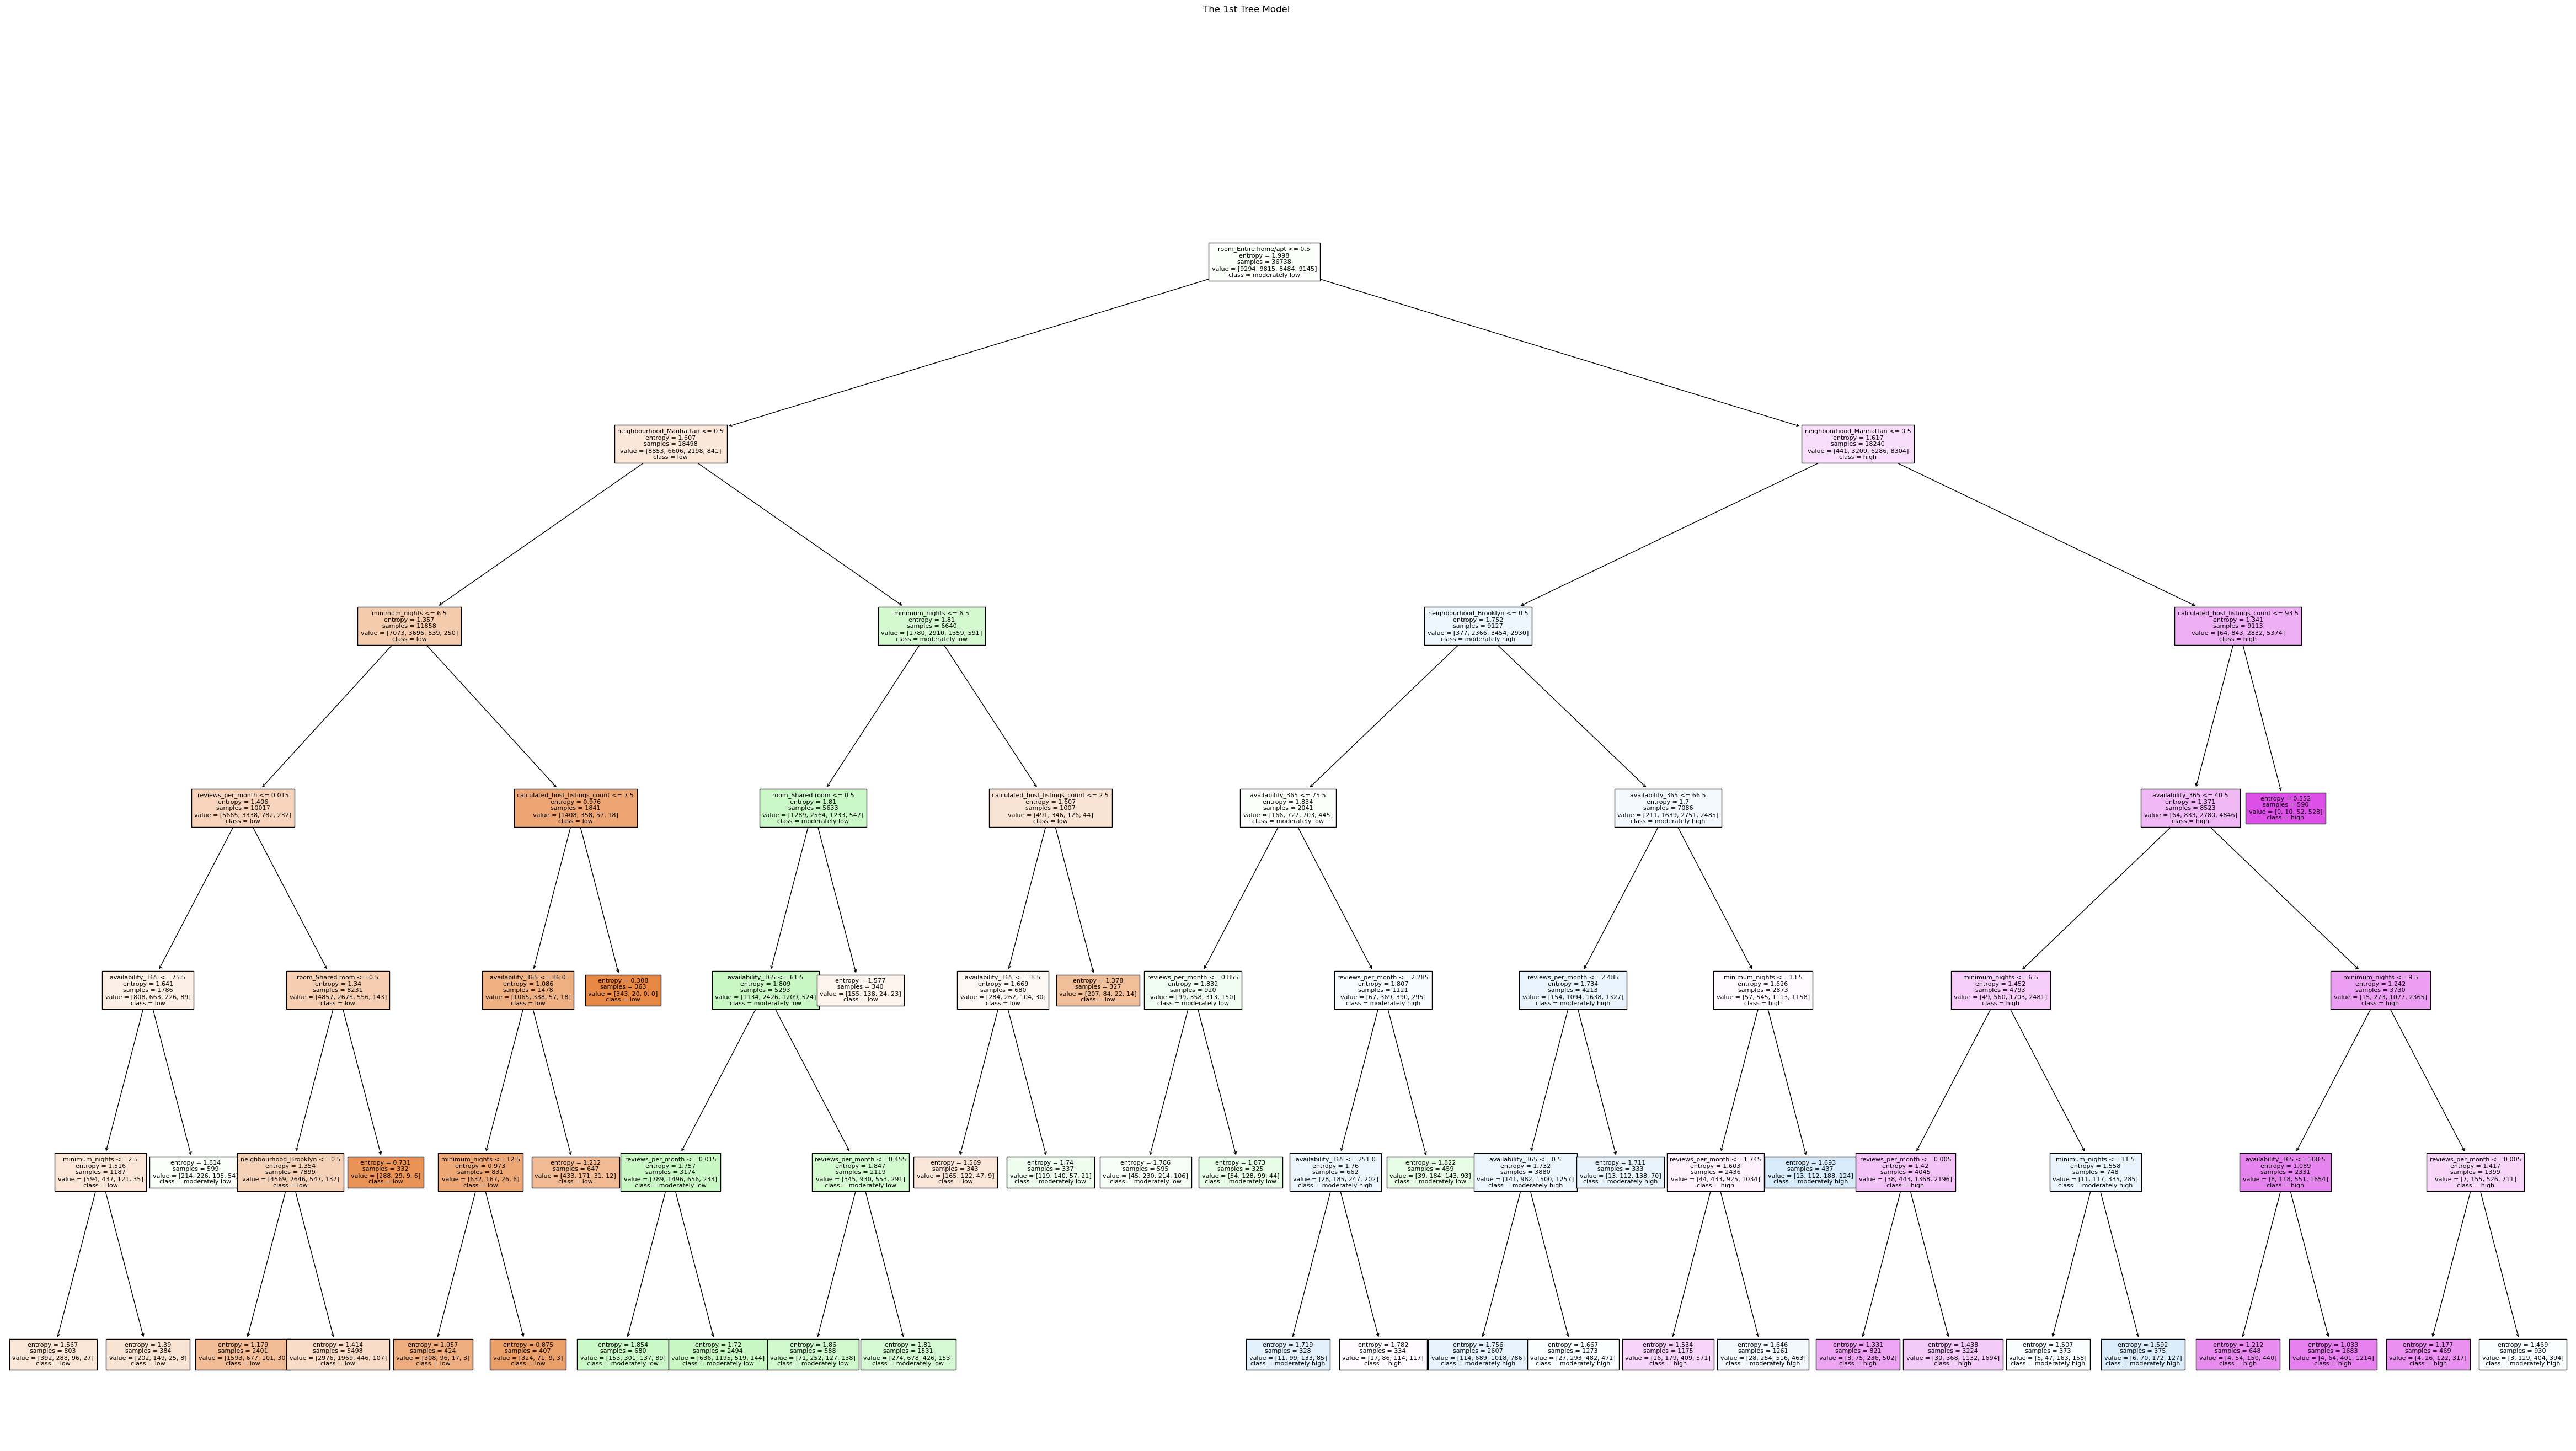

In [164]:
fig = plt.figure(figsize=(60,30))    

plot_tree(decision_tree = model1, 
          feature_names = X_train.columns.to_list(),      
          class_names = ['low', 'moderately low', 'moderately high', 'high'],        
          filled = True,                        
          fontsize = 8);   

fig.suptitle('The 1st Tree Model');             

### Visualizing the information gain from each feature

,Feature,Importance
9,room_Entire home/apt,0.736809
6,neighbourhood_Manhattan,0.151695
0,minimum_nights,0.031710
3,availability_365,0.020024
1,reviews_per_month,0.018672
2,calculated_host_listings_count,0.016768
5,neighbourhood_Brooklyn,0.014838
11,room_Shared room,0.009484
4,neighbourhood_Bronx,0.000000
7,neighbourhood_Queens,0.000000


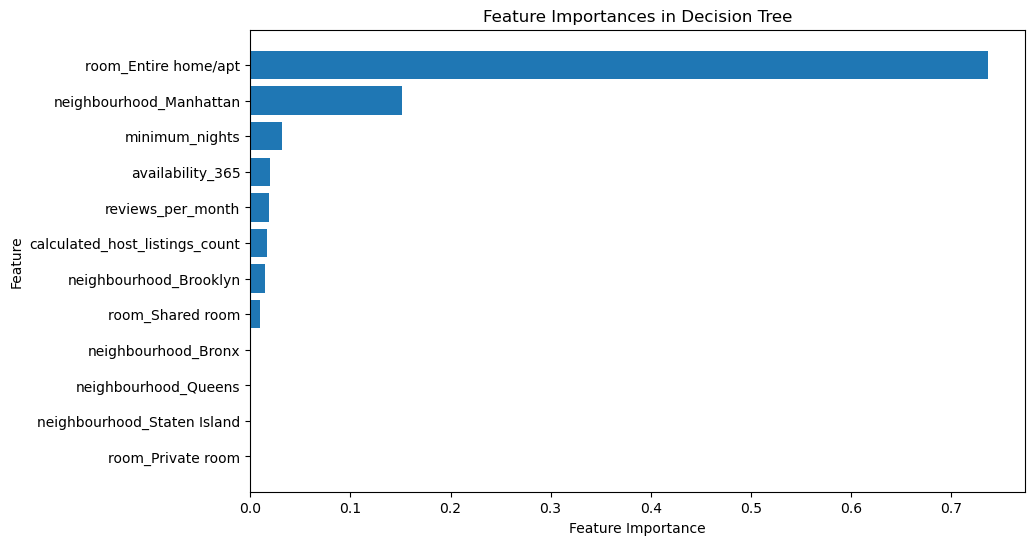

In [165]:
feature_importances = model1.feature_importances_

#creating a dataframe
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

#sorting by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
display(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

### Leaf nodes with the lowest entropy 

In [166]:
#counting the number of leaf nodes 
tree = model1.tree_

#initializing a counter for leaf nodes
leaf_count = 0

#iterating through all nodes
for i in range(tree.node_count):
    if tree.children_left[i] == tree.children_right[i]:
        leaf_count += 1

print(f"Number of leaf nodes: {leaf_count}")

Number of leaf nodes: 38


In [167]:
#showing leaf nodes with entropy less than 1 
def calculate_entropy(probabilities):
    return -np.sum([p * np.log2(p) if p > 0 else 0 for p in probabilities])

terminal_nodes_info = []

terminal_node_order = 0

for i in range(tree.node_count):
    if tree.children_left[i] == tree.children_right[i]:
        terminal_node_order += 1

        value = tree.value[i][0]
        probabilities = value / value.sum()
        
        entropy = calculate_entropy(probabilities)
        
        if entropy < 1:
            terminal_nodes_info.append((terminal_node_order, entropy))

terminal_nodes_info.sort(key=lambda x: x[1])

for node_idx, entropy in terminal_nodes_info:
    print(f"Terminal node {node_idx} - Entropy: {entropy:.4f}")

Terminal node 10 - Entropy: 0.3077
Terminal node 38 - Entropy: 0.5519
Terminal node 6 - Entropy: 0.7309
Terminal node 8 - Entropy: 0.8752


### Interpretations-  
1. Room that are not entire room/apt and not in Manhattan with a minimum nights of more than 6 and a calculated host listings count of more than 7 has a 94.5% probability of being low price. 
2. Entire home/apt in Manhattan with host listings of more than 93 has 89.5% probability of being high price. 

# K-nn classifier

In [169]:
#scaling the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   

X_test_scaled = scaler.transform(X_test)       

In [170]:
#converting the scaled features from an array to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)  

X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

### Finding the best K-value through grid search

In [171]:
knn = KNeighborsClassifier()

#Define the range of k values to search over, from 1 to 200
k_range = {'n_neighbors': np.arange(1,201, 5)}                            

#5-fold cross validation 
grid = GridSearchCV(estimator = knn, param_grid = k_range, cv = 5, error_score='raise')    

grid.fit(X_train_scaled, y_train)     

#fetching the best hyperparameter and cv score 
best_param = grid.best_params_         
best_cv_score = grid.best_score_           

print("Best Params: {}".format(best_param)) 
print("Mean cv score of the best k: {:.2%}".format(best_cv_score)) 

Best Params: {'n_neighbors': 136}
Mean cv score of the best k: 52.41%


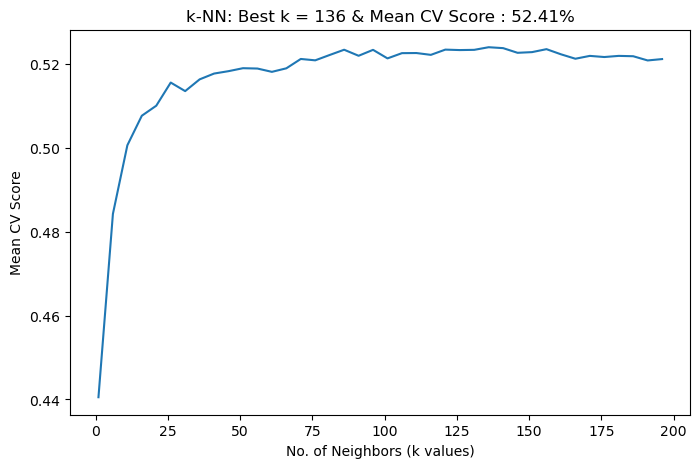

In [172]:
#setting the X and Y axis 
k_values = grid.cv_results_['param_n_neighbors']        
cv_scores = grid.cv_results_['mean_test_score']        

plt.figure(figsize = (8, 5))
plt.plot(k_values,  cv_scores)       
plt.xlabel('No. of Neighbors (k values)')
plt.ylabel('Mean CV Score')
plt.title('k-NN: Best k = {} & Mean CV Score : {:.2%}'.format(best_param['n_neighbors'], best_cv_score));

In [173]:
print('The generalization performance of the best model is {:.2%}.'.format(grid.score(X_test_scaled,y_test)))

The generalization performance of the best model is 52.63%.


### Training a model with the best parameters.

In [174]:
km = KNeighborsClassifier(n_neighbors= 136)  

km.fit(X_train_scaled, y_train)

train_score = km.score(X_train_scaled, y_train)
test_score = km.score(X_test_scaled,y_test)

print("For the 136-NN model,\nTrain Accuracy: {:.2%}\nTest Acc: {:.2%}".format(train_score,test_score)) 

For the 136-NN model,
Train Accuracy: 53.27%
Test Acc: 52.63%


### Predicting price for an example scenario

In [178]:
example = pd.DataFrame(columns= X_train_scaled.columns)
example

,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Bronx,neighbourhood_Brooklyn,neighbourhood_Manhattan,neighbourhood_Queens,neighbourhood_Staten Island,room_Entire home/apt,room_Private room,room_Shared room


In [179]:
#entire home/apt room in manhattan

inputs= [4, 0.2, 5, 25, 0, 0, 1, 0, 0, 1, 0, 0] 
example.loc[len(example)] = inputs     
print(f'Exmaple data point for prediction (entire home/apt in Manhattan')
display(example)

Exmaple data point for prediction (entire home/apt in Manhattan


,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Bronx,neighbourhood_Brooklyn,neighbourhood_Manhattan,neighbourhood_Queens,neighbourhood_Staten Island,room_Entire home/apt,room_Private room,room_Shared room
0,4.0,0.2,5.0,25.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [180]:
def pred(df):     
    # Scaling the features
    df_scaled = scaler.transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    
    # Predicting the price
    prediction = km.predict(df_scaled)
    
    # Ensure extracting a single element from the prediction array
    if prediction[0] == 0: 
      return "low"
    elif prediction[0] == 1: 
      return "moderately low"
    elif prediction[0] == 2:
      return "moderately high"
    else: 
      return "high"

print(f'The price prediction for the example is {pred(example)}')

The price prediction for the example is high


# Model Evaluation

In [181]:
#predicting outcome for X-test for decision tree and knn model

tree_pred = model1.predict(X_test) 
knn_pred = km.predict(X_test)

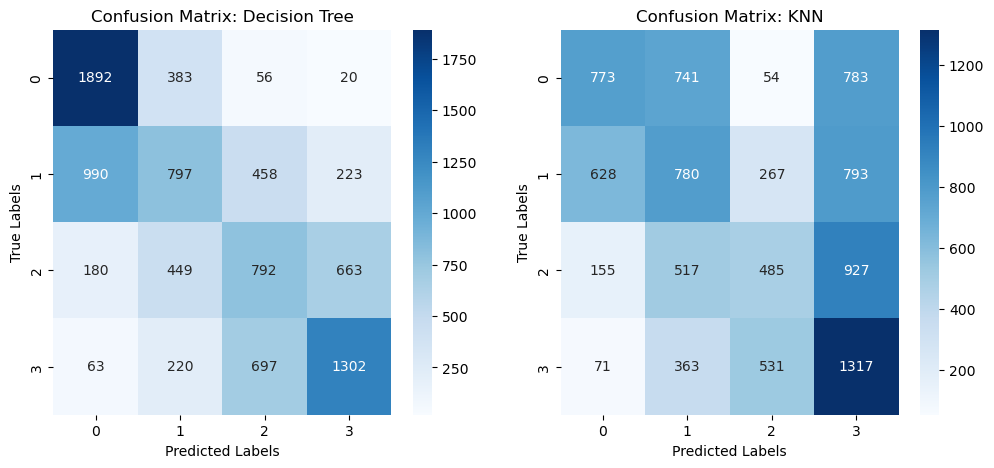

In [182]:
# Compute confusion matrices
conf_matrix_tree = confusion_matrix(y_test, tree_pred)
conf_matrix_knn = confusion_matrix(y_test, knn_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix: Decision Tree')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix: KNN')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.show()

Decision Tree -- classifies low (0) and high (3) price with good precision. However, struggles with moderately low (1) and moderately high (2) class, especially the former. 

K-91 -- classified high (3) price with good precision. Overall, more misclassification than Decision Tree.

In [183]:
low_tpr_tree = 1892 / (1892 + 383 + 52 + 24)
high_tpr_tree = 1343 / (63 + 223 + 653 + 1343)
high_tpr_knn = 1020 / (463 + 368 + 431 + 463)

print('The sensitivity of the decision tree for low price prediction is {:.2f}'.format(low_tpr_tree))
print('The sensitivity of the decision tree for high price prediction is {:.2f}'.format(high_tpr_tree))
print('The sensitivity of the k-91 model for high price prediction is {:.2f}'.format(high_tpr_knn))

The sensitivity of the decision tree for low price prediction is 0.80
The sensitivity of the decision tree for high price prediction is 0.59
The sensitivity of the k-91 model for high price prediction is 0.59
